In [17]:
import numpy as np
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
import matplotlib.image as mpimg      
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import scipy.io as sio
import matplotlib
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

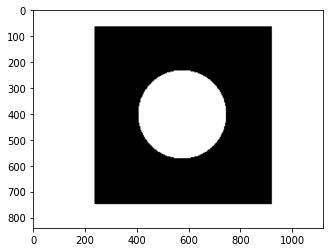

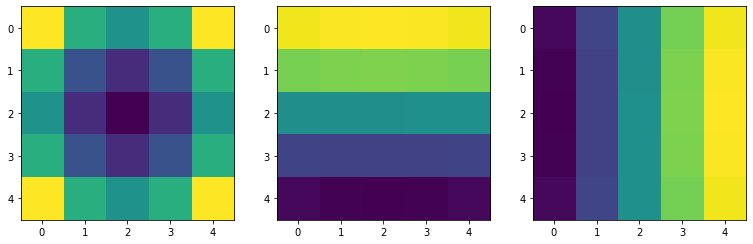

In [18]:
#picure upload
img=mpimg.imread('/Users/elkysandor/Desktop/hujiyr3/geo of data/circle.png',format='png')
plt.imshow(img)

#extract 5x5 paches 
patches = image.extract_patches_2d(img, (5, 5))

#change to b&w format
patches = patches[:,:,:,0]

reshaped = patches.reshape(patches.shape[0],25)
pca = PCA(n_components=3)
pca.fit(reshaped)

top3 = pca.components_.reshape(3,5,5)

#show picture
f, axarr = plt.subplots(1,3,figsize=(13,13)) 
axarr[0].imshow(top3[0])
axarr[1].imshow(top3[1])
axarr[2].imshow(top3[2])

1
error:8690.90920265043
10
error:5788.366782829698
20
error:4501.927216110857
100
error:962.0022243824467


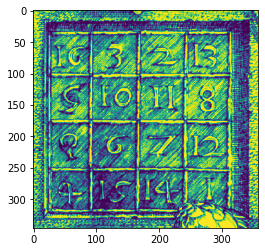

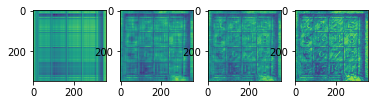

In [19]:
test = sio.loadmat('/Users/elkysandor/Desktop/hujiyr3/geo of data/numbers.mat')
test = test['mat']

pltfull = plt.imshow(test)
# matplotlib.image.imsave("/Users/elkysandor/Desktop/hujiyr3/geo of data/test.png", test, cmap="Greys_r")

errors = np.zeros([1,4])
g, axark = plt.subplots(1,4)    


#שחזור במימדים שונים
for j in range(int(4)):
    i=np.array([1,10,20,100])[j]

    pca_i = PCA(n_components=i)
    reconstruct_i = pca_i.inverse_transform(pca_i.fit_transform(test))

    print(i)
    print("error:{}".format((np.linalg.norm(test-reconstruct_i)**2)))
    
    
#     matplotlib.image.imsave("/Users/elkysandor/Desktop/hujiyr3/geo of data/"+str(i)+".png", reconstruct_i, cmap='Greys_r')
    
    axark[j].imshow(reconstruct_i)

    reconstruct_i


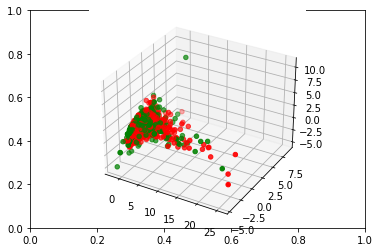

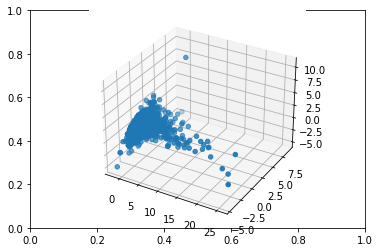

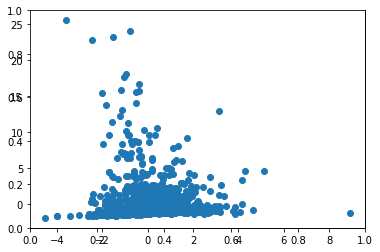

In [20]:



#uploud data


data = pd.read_csv('/Users/elkysandor/Desktop/hujiyr3/geo of data/data.csv')
data = data.select_dtypes(exclude='object')
data = data.dropna()
colour = data.uses_ad_boosts
data = (data-data.mean())/data.std()
data_fpca = data.drop('uses_ad_boosts',axis=1)


#pca

pca = PCA(n_components=3)
pca.fit(np.array(data_fpca))
lower_dim = pca.fit_transform(data_fpca)

#plot
dict_colour = {0:'red',1:'green'}


fig = plt.figure()
fig.subplots(1,1)
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(lower_dim[:,0],lower_dim[:,1],lower_dim[:,2]
           ,c=colour.map(dict_colour))

fig2 = plt.figure()
fig2.subplots(1,1)
ax2 = fig2.add_subplot(111,projection = '3d')
ax2.scatter(lower_dim[:,0],lower_dim[:,1],lower_dim[:,2])

fig3 = plt.figure()
fig3.subplots(1,1)
ax3 = fig3.add_subplot()
ax3.scatter(lower_dim[:,1],lower_dim[:,0])


